In [146]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns


In [147]:

df_train = pd.read_csv('train.csv')

In [148]:
df_train.shape

(3000, 23)

In [149]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [150]:
df_train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [151]:
df_train.head()

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage    imdb_id original_language  \
0                                NaN  tt2637294                en   
1                                NaN  tt0368933                en   
2  http://sonyclassics.com/whiplash/  tt2582802                en   
3         http://kahaanithefilm.com/  tt1821480                hi   
4                                NaN  tt1380152                ko   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   

                                            overview  popularity  ...  \
0  When Lou, who has become the "father of the In...    6.575393  ...   
1  Mia Thermopolis is now a college graduate and ...    8.248895  ...   
2  Under the direction of a ruthless instructor, ...   64.299990  ...   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   
4  Marine Boy is the story of a former national s...    1.148070  ...   

  release_date runtime                                   spoken_languages  \
0      2/20/15    93.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1       8/6/04   113.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2     10/10/14   105.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3       3/9/12   122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
4       2/5/09   118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]   

     status                                            tagline  \
0  Released  The Laws of Space and Time are About to be Vio...   
1  Released  It can take a lifetime to find true love; she'...   
2  Released    The road to greatness can take you to the edge.   
3  Released                                                NaN   
4  Released                                                NaN   

                                      title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                Marine Boy   

                                            Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                NaN   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                crew   revenue  
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000  
3  [{'credit_id': '52fe48779251

In [152]:
df_train.describe()

id        budget   popularity      runtime       revenue
count  3000.000000  3.000000e+03  3000.000000  2998.000000  3.000000e+03
mean   1500.500000  2.253133e+07     8.463274   107.856571  6.672585e+07
std     866.169729  3.702609e+07    12.104000    22.086434  1.375323e+08
min       1.000000  0.000000e+00     0.000001     0.000000  1.000000e+00
25%     750.750000  0.000000e+00     4.018053    94.000000  2.379808e+06
50%    1500.500000  8.000000e+06     7.374861   104.000000  1.680707e+07
75%    2250.250000  2.900000e+07    10.890983   118.000000  6.891920e+07
max    3000.000000  3.800000e+08   294.337037   338.000000  1.519558e+09

In [153]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [154]:
print(df_train['revenue'].isna().sum())
print(len(df_train[df_train['revenue'] == 0]))

0
0


Examine Numeric/Datetime Features: Budget, Runtime, Popularity, Release Date

Text(0.5, 1.0, 'Budget vs. Revenue')

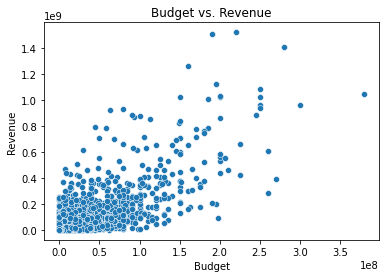

In [155]:

sns.scatterplot(x='budget',y='revenue',data=df_train)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue')

In [156]:
print(df_train['budget'].isna().sum())
print(len(df_train[df_train['budget'] == 0]))


0
812


0s in budget mean missing values – for now we'll replace with NA

In [157]:
df_train['budget'] = df_train['budget'].replace(0, np.NaN)
print(df_train['budget'].isna().sum())

812


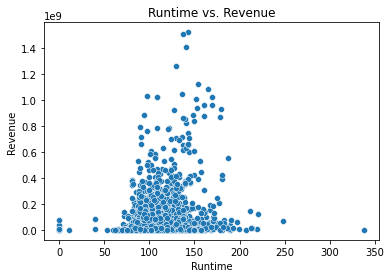

In [158]:

sns.scatterplot(x='runtime',y='revenue',data=df_train)
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.title('Runtime vs. Revenue')
plt.show()

In [159]:
print(df_train['runtime'].isnull().sum())
print(len(df_train[df_train['runtime'] == 0]))
print(df_train['runtime'].mean())

2
12
107.85657104736491


In [160]:
df_train['runtime'] = df_train['runtime'].replace(0, df_train['runtime'].mean())
df_train['runtime'] = df_train['runtime'].fillna(df_train['runtime'].mean())

Text(0.5, 1.0, 'Popularity vs. Revenue')

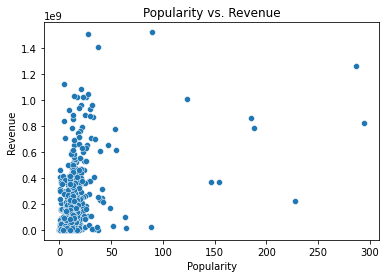

In [161]:

sns.scatterplot(x='popularity',y='revenue',data=df_train)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Popularity vs. Revenue')

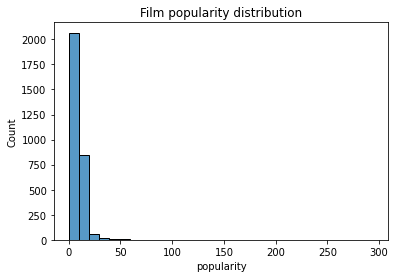

In [162]:
sns.histplot(x='popularity',data=df_train,bins=30)
plt.title('Film popularity distribution')
plt.show()

In [163]:
df_train.popularity.describe()

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64

In [164]:
print(df_train[df_train['popularity']>10].shape)
#df_train[df_train['popularity']>10].head()

df_train.sort_values('popularity',ascending=False).head()

(903, 23)


id                              belongs_to_collection       budget  \
518    519  [{'id': 468552, 'name': 'Wonder Woman Collecti...  149000000.0   
684    685                                                NaN  160000000.0   
1695  1696                                                NaN   34000000.0   
2326  2327  [{'id': 448150, 'name': 'Deadpool Collection',...   58000000.0   
2126  2127  [{'id': 284433, 'name': 'Guardians of the Gala...  200000000.0   

                                                 genres  \
518   [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
684   [{'id': 10751, 'name': 'Family'}, {'id': 14, '...   
1695  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
2326  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
2126  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                               homepage    imdb_id  \
518              http://www.warnerbros.com/wonder-woman  tt0451279   
684   http://movies.disney.com/beauty-and-the-beast-...  tt2771200   
1695                                                NaN  tt3890160   
2326           http://www.foxmovies.com/movies/deadpool  tt1431045   
2126  http://marvel.com/movies/movie/221/guardians_o...  tt3896198   

     original_language                  original_title  \
518                 en                    Wonder Woman   
684                 en            Beauty and the Beast   
1695                en                     Baby Driver   
2326                en                        Deadpool   
2126                en  Guardians of the Galaxy Vol. 2   

                                               overview  popularity  ...  \
518   An Amazon princess comes to the world of Man t...  294.337037  ...   
684   A live-action adaptation of Disney's version o...  287.253654  ...   
1695  After being coerced into working for a crime b...  228.032744  ...   
2326  Deadpool tells the origin story of former Spec...  187.860492  ...   
2126  The Guardians must fight to keep their newfoun...  185.330992  ...   

     release_date runtime                                   spoken_languages  \
518       5/30/17   141.0  [{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...   
684       3/16/17   129.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1695      6/28/17   113.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2326       2/9/16   108.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2126      4/19/17   137.0           [{'iso_639_1': 'en', 'name': 'English'}]   

        status                                  tagline  \
518   Released            Power. Grace. Wisdom. Wonder.   
684   Released                            Be our guest.   
1695  Released        All you need is one killer track.   
2326  Released  Witness the beginning of a happy ending   
2126  Released                               Obviously.   

                               title  \
518                     Wonder Woman   
684             Beauty and the Beast   
1695                     Baby Driver   
2326                        Deadpool   
2126  Guardians of the Galaxy Vol. 2   

                                               Keywords  \
518   [{'id': 849, 'name': 'dc comics'}, {'id': 1701...   
684   [{'id': 254, 'name': 'france'}, {'id': 2343, '...   
1695  [{'id': 642, 'name': 'robbery'}, {'id': 2076, ...   
2326  [{'id': 2095, 'name': 'anti hero'}, {'id': 307...   
2126  [{'id': 9663, 'name': 'sequel'}, {'id': 9715, ...   

                                                   cast  \
518                                                 NaN   
684   [{'cast_id': 174, 'character': 'Belle', 'credi...   
1695  [{'cast_id': 9, 'character': 'Baby', 'credit_i...   
2326  [{'cast_id': 99, 'character': 'Wade Wilson / D...   
2126  [{'cast_id': 3, 'character': 'Peter Quill / St...   

                                                   crew     revenue  
518                                                 NaN   820580447  
684   [{'credit_id': '551879be

These seem plausible: originally I was worried that popularity was intended to be on a 1-10 scale and the outliers were errors, but the films on the highest popularity range seem plausible + further examination of the source database online doesn't have information on how popularity is scaled.

It seems instead that popularity is merely a highly skewed metric.

In [165]:
df_train['release_date'] = df_train['release_date'].apply(pd.to_datetime)

In [166]:
print(df_train.release_date.describe(datetime_is_numeric=True))
#data was scraped in 2017, years beyond that are obvious mistakes
print(df_train[df_train['release_date'].dt.year > 2018].shape)

count                             3000
mean     2005-10-31 02:24:57.600000128
min                1972-01-13 00:00:00
25%                1996-02-22 12:00:00
50%                2006-03-26 00:00:00
75%                2012-10-18 12:00:00
max                2071-12-29 00:00:00
Name: release_date, dtype: object
(168, 23)


In [167]:
print(df_train[df_train['release_date'].dt.year > 2017].shape)

(168, 23)


In [168]:
df_train[df_train['release_date'].dt.year > 2017].head()


id belongs_to_collection      budget  \
39  40                   NaN   3800000.0   
41  42                   NaN   3000000.0   
51  52                   NaN  12000000.0   
61  62                   NaN   4000000.0   
68  69                   NaN   2000000.0   

                                               genres homepage    imdb_id  \
39  [{'id': 10752, 'name': 'War'}, {'id': 37, 'nam...      NaN  tt0059418   
41  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...      NaN  tt0061512   
51  [{'id': 12, 'name': 'Adventure'}, {'id': 35, '...      NaN  tt0059243   
61                      [{'id': 18, 'name': 'Drama'}]      NaN  tt0049875   
68  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...      NaN  tt0056592   

   original_language         original_title  \
39                en           Major Dundee   
41                en         Cool Hand Luke   
51                en         The Great Race   
61                en                Trapeze   
68                en  To Kill a Mockingbird   

                                             overview  popularity  ...  \
39  During the last winter of the Civil War, caval...    3.055936  ...   
41  When petty criminal Luke Jackson is sentenced ...    9.718713  ...   
51  Professional daredevil and white-suited hero, ...    4.473327  ...   
61  A pair of men try to perform the dangerous "tr...    1.801071  ...   
68  In a small Alabama town in the 1930s, scrupulo...   14.284787  ...   

   release_date runtime                                   spoken_languages  \
39   2065-04-07   123.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
41   2067-06-22   126.0           [{'iso_639_1': 'en', 'name': 'English'}]   
51   2065-07-01   160.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
61   2056-05-30   105.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
68   2062-12-25   129.0           [{'iso_639_1': 'en', 'name': 'English'}]   

      status                                            tagline  \
39  Released                                                NaN   
41  Released     What we've got here is failure to communicate.   
51  Released  The movie with 20,000-mile or one-million-laug...   
61  Released  High...High...High...Above Them All! - in exci...   
68  Released                                                NaN   

                    title                                           Keywords  \
39           Major Dundee  [{'id': 534, 'name': 'mexico'}, {'id': 1968, '...   
41         Cool Hand Luke  [{'id': 378, 'name': 'prison'}, {'id': 526, 'n...   
51         The Great Race  [{'id': 9253, 'name': 'slapstick'}, {'id': 159...   
61                Trapeze  [{'id': 291, 'name': 'circus'}, {'id': 180181,...   
68  To Kill a Mockingbird  [{'id': 577, 'name': 'black people'}, {'id': 8...   

                                                 cast  \
39  [{'cast_id': 1, 'character': 'Major Amos Charl...   
41  [{'cast_id': 13, 'character': 'Luke Jackson', ...   
51  [{'cast_id': 1, 'character': 'Prof. Fate', 'cr...   
61  [{'cast_id': 2, 'character': 'Mike Ribble', 'c...   
68  [{'cast_id': 8, 'character': 'Atticus Finch', ...   

                                                 crew   revenue  
39  [{'credit_id': '52fe45f5c3a368484e078d7b', 'de...     14873  
41  [{'credit_id': '52fe428ac3a36847f8026d8d', 'de...  16217773  
51  [{'credit_id': '52fe445e9251416c75032581', 'de...  25333333  
61  [{'credit_id': '52fe4594c3a36847f80cf3b9', 'de...  14400000  
68  [{'credit_id': '52fe4259c3a36847f801770d', 'de...  13129846  

[5 rows x 23 columns]

In [169]:
#100 year off mistake
df_train.loc[df_train['release_date'].dt.year > 2017,'release_date'] -= pd.DateOffset(years=100)


Text(0.5, 1.0, 'Revenue of Films over Time')

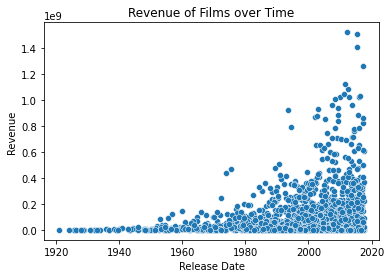

In [170]:
sns.scatterplot(x='release_date',y='revenue',data=df_train)
plt.xlabel('Release Date')
plt.ylabel('Revenue')
plt.title('Revenue of Films over Time')



Text(0.5, 1.0, 'Release Year vs Average Revenue')

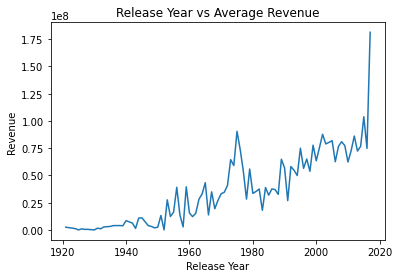

In [171]:
year = df_train['release_date'].dt.year
df_train.groupby(year)['revenue'].mean().plot()
plt.xlabel('Release Year')
plt.ylabel('Revenue');
plt.title("Release Year vs Average Revenue")

Examine Categorical Features:

First we will remove unnecessary features.

In [172]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [173]:
df_train.duplicated('id').sum()
df_train.drop(labels = ['id'],axis =1, inplace=True)

In [174]:
#drop imdb ids
df_train.imdb_id.duplicated().sum()
df_train.drop(labels='imdb_id',axis=1,inplace=True)


In [175]:
#create bool to track existence of homepages, then remove row with links
df_train['homepage_bool'] = df_train['homepage'].notna().astype('int')
df_train['homepage_bool'].sum()
df_train.drop(labels = ['homepage'],axis =1, inplace=True)


In [176]:

print(df_train['belongs_to_collection'].head())
print(df_train['belongs_to_collection'].isna().sum())

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: belongs_to_collection, dtype: object
2396


In [177]:
#create bool to track belonging to a collection
print(df_train['belongs_to_collection'].value_counts())
print(df_train['belongs_to_collection'].nunique())


df_train['belongs_to_collection_bool'] = df_train['belongs_to_collection'].notna().astype('int')
df_train.drop(labels = ['belongs_to_collection'],axis =1, inplace=True)

[{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}]                      16
[{'id': 9735, 'name': 'Friday the 13th Collection', 'poster_path': '/uobgqpLQff9WvxGKE2OSvXv1RHm.jpg', 'backdrop_path': '/c7pMKwv5NzIN6N3KM4L8fYMTtPw.jpg'}]                7
[{'id': 937, 'name': 'The Pink Panther (Original) Collection', 'poster_path': '/xu6gZ0zGUSR8SC2QLKFaUrX2niM.jpg', 'backdrop_path': '/6KE7AguGR3UqwUn5RkzkoBc3MLy.jpg'}]     6
[{'id': 9338, 'name': 'Police Academy Collection', 'poster_path': '/1VRdXVy2FYlX4EtllnLKWK6kYDJ.jpg', 'backdrop_path': '/RhpI828r9EKPV4x0pyHiqCDZDQ.jpg'}]                  5
[{'id': 34055, 'name': 'Pokémon Collection', 'poster_path': '/j5te0YNZAMXDBnsqTUDKIBEt8iu.jpg', 'backdrop_path': '/iGoYKA0TFfgSoZpG2u5viTJMGfK.jpg'}]                       5
                                                                                                                                  

In [178]:
#original language
print(df_train['original_language'].isna().sum())
print(df_train['original_language'].value_counts())



0
en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
da       5
fa       5
ro       4
tr       3
hu       3
no       2
te       2
pl       2
ml       2
fi       2
el       1
vi       1
id       1
ur       1
he       1
mr       1
bn       1
ar       1
cs       1
sr       1
nb       1
Name: original_language, dtype: int64


In [179]:
#create bool to track english or foreign movie
df_train['en_film'] = [1 if x =='en' else 0 for x in df_train['original_language']]
df_train['en_film']


0       1
1       1
2       1
3       0
4       0
       ..
2995    1
2996    0
2997    1
2998    1
2999    1
Name: en_film, Length: 3000, dtype: int64

In [180]:
#drop original titles
print(df_train.original_title.value_counts())
print(df_train.original_title.nunique())
df_train.drop(labels=['original_title'],axis=1,inplace=True)

Alone in the Dark             2
Hercules                      2
Bad Boys                      2
Ben-Hur                       2
Anna Karenina                 2
                             ..
The Nice Guys                 1
Head On                       1
American Dream                1
Obitaemyy Ostrov. Skhvatka    1
Going My Way                  1
Name: original_title, Length: 2975, dtype: int64
2975


In [181]:
#drop overview
df_train.drop(labels=['overview'],axis=1,inplace=True)

In [182]:
#drop poster path
df_train.drop(labels=['poster_path'],axis=1,inplace=True)

In [183]:
#genres 
df_train.genres
df_train.genres[0]

def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d


In [184]:
df_train.is_co
df_train['genre_name'] = pd.Series(dtype='object')
j = 0
for i in df_train['genres']:
    d = get_dictionary(i)
    if d != {}:
        df_train['genre_name'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df_train['genre_name'].iloc[j] = np.NaN
    j += 1
df_train['genre_name']

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0                                 [Comedy]
1         [Comedy, Drama, Family, Romance]
2                                  [Drama]
3                        [Thriller, Drama]
4                       [Action, Thriller]
                       ...                
2995                     [Comedy, Romance]
2996                        [Drama, Music]
2997    [Crime, Action, Mystery, Thriller]
2998                     [Comedy, Romance]
2999           [Thriller, Action, Mystery]
Name: genre_name, Length: 3000, dtype: object

In [106]:
df_train.drop(labels=['genres'],axis=1,inplace=True)

In [111]:
#production companies 
df_train['production_companies'].value_counts().head(15)

[{'name': 'Paramount Pictures', 'id': 4}]                                                    51
[{'name': 'Universal Pictures', 'id': 33}]                                                   36
[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]                                          32
[{'name': 'Warner Bros.', 'id': 6194}]                                                       32
[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]                              24
[{'name': 'Touchstone Pictures', 'id': 9195}]                                                17
[{'name': 'New Line Cinema', 'id': 12}]                                                      17
[{'name': 'Columbia Pictures', 'id': 5}]                                                     17
[{'name': 'TriStar Pictures', 'id': 559}]                                                    16
[{'name': 'Orion Pictures', 'id': 41}]                                                       12
[{'name': 'Walt Disney Pictures', 'id': 

In [112]:
#procoun number

df_train['procoun_num'] = pd.Series(dtype=np.int64)
j = 0
for i in df_train['production_companies']:
    d = get_dictionary(i)
    if d != {}:
        df_train['procoun_num'].iloc[j] = len(d)
    else:
        df_train['procoun_num'].iloc[j] = np.NaN
    j += 1
df_train['procoun_num'] 

0       3.0
1       1.0
2       3.0
3       NaN
4       NaN
       ... 
2995    2.0
2996    2.0
2997    3.0
2998    2.0
2999    6.0
Name: procoun_num, Length: 3000, dtype: float64

In [113]:
print(df_train['procoun_num'].isna().sum())
df_train['procoun_num'] = df_train['procoun_num'].fillna(df_train['procoun_num'].mean())

156


In [114]:
#production companies
df_train['pro_companies'] = pd.Series(dtype='object')
j = 0
for i in df_train['production_companies']:
    d = get_dictionary(i)
    if d != {}:
        df_train['pro_companies'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df_train['pro_companies'].iloc[j] = np.NaN
    j += 1

df_train.drop(labels=['production_companies'],axis=1,inplace=True)

In [115]:
df_train['pro_companies']

0       [Paramount Pictures, United Artists, Metro-Gol...
1                                  [Walt Disney Pictures]
2       [Bold Films, Blumhouse Productions, Right of W...
3                                                     NaN
4                                                     NaN
                              ...                        
2995             [Warner Bros., Morgan Creek Productions]
2996                           [Memfis Film, Film i Väst]
2997    [New Line Cinema, Forge, The Steve Tisch Company]
2998                   [Jersey Films, Loofah Productions]
2999    [Lions Gate Films, Vertigo Entertainment, Goth...
Name: pro_companies, Length: 3000, dtype: object

In [116]:
#production countries
df_train['production_countries'].value_counts()
df_train['pro_co'] = pd.Series(dtype='object')
j = 0
for i in df_train['production_countries']:
    d = get_dictionary(i)
    if d != {}:
        df_train['pro_co'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df_train['pro_co'].iloc[j] = np.NaN
    j += 1
df_train['pro_co']
df_train.drop(labels=['production_countries'],axis=1,inplace=True)

In [117]:
#create bool to track if film is a usa production
print(df_train['pro_co'].isna().sum())
df_train['pro_co'].fillna('',inplace=True)
df_train['usa_production'] = [1 if 'United States of America' in x else 0 for x in df_train['pro_co']]
df_train['pro_co'] = df_train['pro_co'].replace('', np.NaN)
df_train['usa_production']

55


0       1
1       1
2       1
3       0
4       0
       ..
2995    1
2996    0
2997    1
2998    1
2999    1
Name: usa_production, Length: 3000, dtype: int64

In [118]:
#spoken languages 
#df_train['spoken_languages'] = pd.DataFrame()
df_train['lang_num'] = pd.Series(dtype=np.int64)
j = 0
for i in df_train['spoken_languages']:
    d = get_dictionary(i)
    if d != {}:
        df_train['lang_num'].iloc[j] = len(d)
    else:
        df_train['lang_num'].iloc[j] = np.NaN
    j += 1


In [119]:
df_train['spoken_languages'].nunique()

401

In [120]:
df_train.drop(labels=['spoken_languages'],axis=1,inplace=True)

df_train['lang_num'].head()

0    1.0
1    1.0
2    1.0
3    2.0
4    1.0
Name: lang_num, dtype: float64

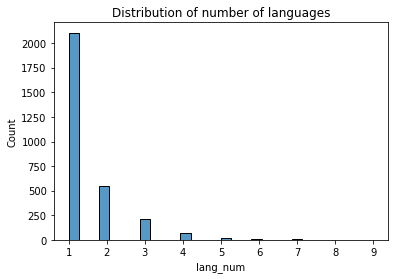

In [121]:
sns.histplot(x='lang_num',data=df_train,bins=30)
plt.title('Distribution of number of languages')
plt.show()

Text(0.5, 1.0, 'Number of Languages vs. Revenue')

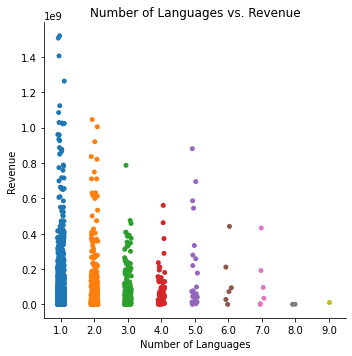

In [122]:

sns.catplot(x='lang_num',y='revenue',data=df_train)
plt.xlabel('Number of Languages')
plt.ylabel('Revenue')
plt.title('Number of Languages vs. Revenue')


In [123]:
#status 
print(df_train['status'].value_counts())
df_train['released'] = [1 if x =='Released' else 0 for x in df_train['status']]

df_train.drop(labels=['status'],axis=1,inplace=True)
df_train['released'].sum()

Released    2996
Rumored        4
Name: status, dtype: int64


2996

In [124]:
#tagline
print(df_train['tagline'].isna().sum())
#create bool for tracking existence of tagline 
df_train['has_tagline'] = df_train['tagline'].notna().astype('int')

df_train.drop(labels=['tagline'],axis=1,inplace=True)


597


In [125]:
#drop title
df_train['title']
df_train.drop(labels=['title'],axis=1,inplace=True)

In [140]:
#keywords
df_train.is_copy = False
df_train['Keywords']

df_train['keywords'] = pd.Series(dtype='object')
j = 0
for i in df_train['Keywords']:
    d = get_dictionary(i)
    if d != {}:
        df_train['keywords'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df_train['keywords'].iloc[j] = np.NaN
    j += 1

df_train.drop(labels=['Keywords'],axis=1,inplace=True)

KeyError: 'Keywords'

In [127]:
#cast_size

df_train['cast_size'] = pd.Series(dtype=np.int64)
j = 0
for i in df_train['cast']:
    d = get_dictionary(i)
    if d != {}:
        df_train['cast_size'].iloc[j] = len(d)
    else:
        df_train['cast_size'].iloc[j] = np.NaN
    j += 1
df_train['cast_size']

0       24.0
1       20.0
2       51.0
3        7.0
4        4.0
        ... 
2995    15.0
2996    11.0
2997    15.0
2998    26.0
2999    34.0
Name: cast_size, Length: 3000, dtype: float64

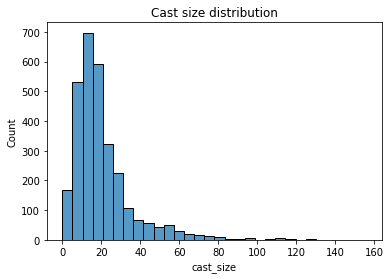

In [128]:
sns.histplot(x='cast_size',data=df_train,bins=30)
plt.title('Cast size distribution')
plt.show()

Text(0.5, 1.0, 'Cast size vs. Revenue')

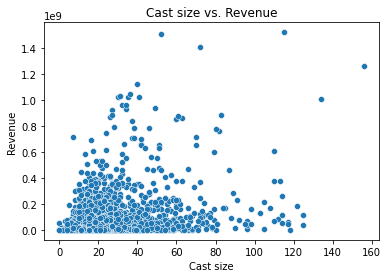

In [129]:

sns.scatterplot(x='cast_size',y='revenue',data=df_train)
plt.xlabel('Cast size')
plt.ylabel('Revenue')
plt.title('Cast size vs. Revenue')


In [130]:
#crew size
df_train['crew_size'] = pd.Series(dtype=np.int64)
j = 0
for i in df_train['crew']:
    d = get_dictionary(i)
    if d != {}:
        df_train['crew_size'].iloc[j] = len(d)
    else:
        df_train['crew_size'].iloc[j] = np.NaN
    j += 1
df_train['crew_size']

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0       72.0
1        9.0
2       64.0
3        3.0
4        2.0
        ... 
2995    17.0
2996    15.0
2997    10.0
2998    89.0
2999    48.0
Name: crew_size, Length: 3000, dtype: float64

Text(0.5, 1.0, 'Crew size vs. Revenue')

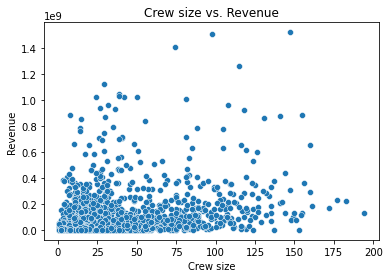

In [131]:

sns.scatterplot(x='crew_size',y='revenue',data=df_train)
plt.xlabel('Crew size')
plt.ylabel('Revenue')
plt.title('Crew size vs. Revenue')


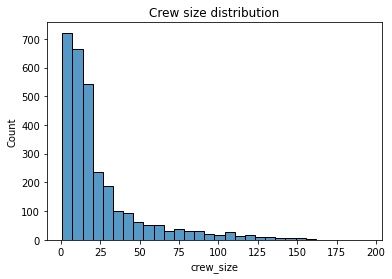

In [132]:
sns.histplot(x='crew_size',data=df_train,bins=30)
plt.title('Crew size distribution')
plt.show()

As of right now we will keep the original cast and crew variables with every director/actor/crewmember's information, though I don't believe they will be of particular use going forward, as this information is very film specific. 

In [133]:
df_train.columns

Index(['budget', 'original_language', 'popularity', 'release_date', 'runtime',
       'cast', 'crew', 'revenue', 'homepage_bool',
       'belongs_to_collection_bool', 'en_film', 'genre_name', 'procoun_num',
       'pro_companies', 'pro_co', 'usa_production', 'lang_num', 'released',
       'has_tagline', 'keywords', 'cast_size', 'crew_size'],
      dtype='object')

In [134]:
#pandas profiling
profile = ProfileReport(df_train, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

There are several promising correlations with revenue among our numeric and boolean features, including budget, popularity and cast-size. In order to further examine the role of remaining categorical values (genre, original language, possibly some features tied to keywords), further EDA is necessary.

In [135]:
print(df_train.shape)
print(df_train.columns)

(3000, 22)
Index(['budget', 'original_language', 'popularity', 'release_date', 'runtime',
       'cast', 'crew', 'revenue', 'homepage_bool',
       'belongs_to_collection_bool', 'en_film', 'genre_name', 'procoun_num',
       'pro_companies', 'pro_co', 'usa_production', 'lang_num', 'released',
       'has_tagline', 'keywords', 'cast_size', 'crew_size'],
      dtype='object')




There were originally 3000 rows x 23 columns worth of data. The clean version includes 3000 rows x 22 columns of data.

However, many of the original columns have been dropped and replaced with booleans. We removed columns that were only useful for id purposes (imdb ids, ids, original titles, titles, descriptions, and internet links). We replaced columns with tagline and website information with booleans tracking the existence of these features, and reorganized status of release as a boolean as well. 

We created new features to track the cast size, crew size, number of production companies, and number of spoken languages. We also created new boolean features to track whether a movie was originally in english and whether it was originally produced in the US. 

We cleaned features with information on keyword and genre name for further analysis. Though we retained further information on cast and crew, we did not particularly clean these variables as they do not seem as though they will be of particular use in the future. We might do more work with them in later steps, however, so they will stay in our dataset for now.

Around 25% of budgets are missing, which is unfortunate, as budgets have an evidently strong correlation with revenue already.

We replaced a small number of missing values with means for runtimes and number of production countries. 

At this point, we have several features that could potentially play a role in predicting revenue, including budget, cast size, and popularity, as well as possibly USA production. Moving forward, we will continue to examine these features, as well as further examine the role genre plays on revenue, and try to see if there are any keywords with strong revenue correlations. 

In [136]:
# save the data to a new csv file
df_train.to_csv('movies.csv')